<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Variables-in-the-dataset" data-toc-modified-id="Variables-in-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variables in the dataset</a></span></li></ul></li><li><span><a href="#Sourcing-and-Loading-the-Data" data-toc-modified-id="Sourcing-and-Loading-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sourcing and Loading the Data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load the data</a></span></li></ul></li><li><span><a href="#Cleaning,-transforming-and-visualizing-data" data-toc-modified-id="Cleaning,-transforming-and-visualizing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cleaning, transforming and visualizing data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorical Variables</a></span></li><li><span><a href="#Numeric-Features" data-toc-modified-id="Numeric-Features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Numeric Features</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#A-visual-summary-of-the-expenses-of-people-at-different-ages" data-toc-modified-id="A-visual-summary-of-the-expenses-of-people-at-different-ages-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>A visual summary of the expenses of people at different ages</a></span></li><li><span><a href="#Saving-data" data-toc-modified-id="Saving-data-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Saving data</a></span></li></ul></li></ul></div>

Project: Customer Behavior Analysis  and Prediction

## Introduction

Customer Personality Analysis helps the business to better understand its customers and makes it easier for them to make decisions based on its target customers groups.

This project is using the dataset ['marketing_campaign.csv'](https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv) from kaggle and investigating if customers would accept the offer from the last campaign, which is a very common problem many retailer business is facing to.

###  Objective

To perform machine learning to forecast if an mid-aged (40-50) customer would accept the offer in the last champaign.

For each technique and its corresponding model, I will assess its performance by comparing the predicted output with the actual result. Finally, all models will be compared to each other, and we will find out which algorithm works the best.

###  Variables in the dataset

a. Customer information
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Complain: if the customer complained in the last 2 years
***
b. Amount spent on each category in last 2 years
 - MntWines: Amount spent on wine
 - MntFruits: Amount spent on fruits
 - MntMeatProducts: Amount spent on meat
 - MntFishProducts: Amount spent on fish
 - MntSweetProducts: Amount spent on sweets
 - MntGoldProds: Amount spent on gold
***
c. Places where customers make the purchase
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to company’s website in the last month
***
d. Promotion activities response
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Sourcing and Loading the Data

This step focuses on importing packages, and organizing data to make sure that the data's well defined.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

sns.set()

### Load the data

In [2]:
# read data
df = pd.read_csv('./Data/marketing_campaign.csv', sep='\t')

In [3]:
# check the first few rows of data to identify the features (dependent and independent)
print(df.shape)
df.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.ID.nunique()

2240

 - The dataset contains information of 2240 customers and 29 features. 

In [5]:
# Check for missing values in the dataset
df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Length: 2240, dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Initial observations:**
 
 - No null values in the dataset
 - 3 categorical objects
 - 'Dt_Customer' needs to be parsed as datetime data type

## Cleaning, transforming and visualizing data

###  Categorical Variables 

 - 'Education ' and 'Marital_Status'

In [9]:
def bar_plot(variable):
    """
        input: variable ex: "Education"
        output: value count
    """
    # get feature
    var = df[variable]
    # count the number of categorical variable
    varValue = var.value_counts()                                
    
    # visualize
    plt.figure(figsize = (8,4))
   
    plt.bar(varValue.index, varValue,width=0.5)                           
    plt.xticks(varValue.index, varValue.index.values)             
    plt.ylabel("Count")
    plt.title(variable)

    print("{}: \n{}".format(variable,varValue))

Education: 
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


Marital_Status: 
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64




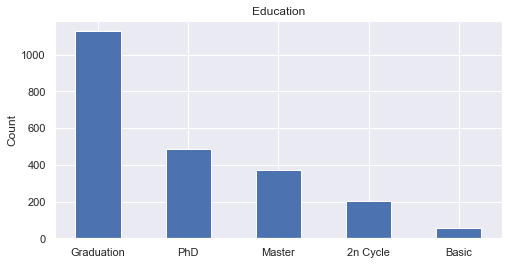

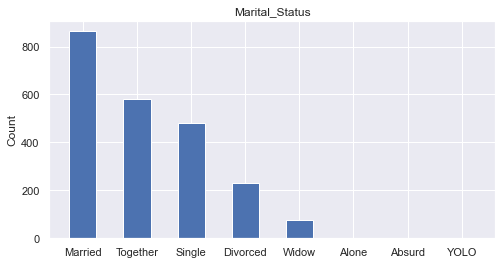

In [10]:
# visualize two categories: 'Education ' and 'Marital_Status'
category = ["Education","Marital_Status"]
for c in category :
    bar_plot(c)
    print("\n")

In [11]:
# Organize 'Education' and combine the "Basic" and "2n Cycle" education level into an "Undergraduate" level
df['Edu'] = df.Education.replace({"Basic":"Undergrad","2n Cycle":"Undergrad", 
                                            "Graduation":"Grad", "Master":"Postgrad","PhD":"Postgrad"})

In [12]:
# use 'single' and 'couple' in relationships
df['Household'] = df.Marital_Status.replace({"Married":"couple","Together":"couple",
                                             "Absurd":"single","Widow":"single",
                                             "YOLO":"single","Divorced":"single", "Single":"single", "Alone":"single"})

Edu: 
Grad         1127
Postgrad      856
Undergrad     257
Name: Edu, dtype: int64


Household: 
couple    1444
single     796
Name: Household, dtype: int64




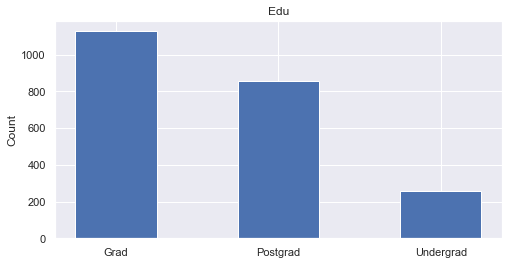

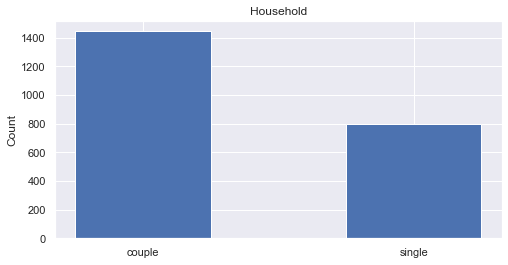

In [13]:
category = ["Edu","Household"]
for c in category :
    bar_plot(c)
    print("\n")                                             

In [14]:
# Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
# fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
# df.Education.value_counts().plot(kind='bar', ax=ax[0])
# ax[0].set_title('Education')
# ax[0].set_xlabel('Count')
# df.Marital_Status.value_counts().plot(kind='bar', ax=ax[1])
# ax[1].set_title('Marital_Status')
# ax[1].set_xlabel('Count')

# Give the subplots a little "breathing room" with a wspace of 0.5
# keep the square figure size but put more margin around the subplots
# plt.subplots_adjust(bottom=0.3, top=0.8, wspace=0.5, hspace=0);

###  Numeric Features

 - 'Age' and 'Income'

In [15]:
# find the age of customers and save as a new feature 'Age' 
df['Age'] = 2022 - df.Year_Birth

Text(0, 0.5, 'Count')

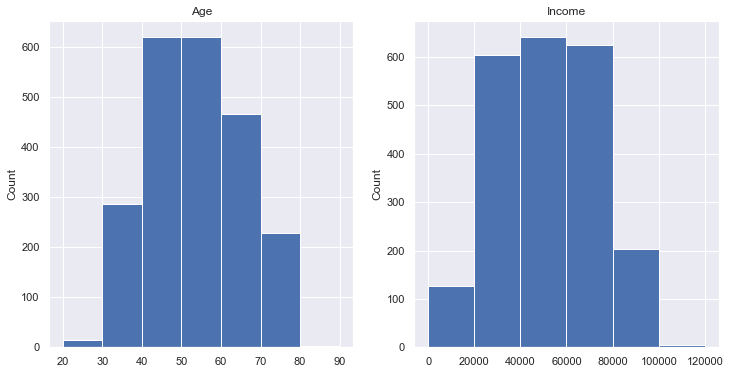

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Age.plot(kind='hist', bins=[20,30,40,50,60,70,80,90], ax=ax[0])
ax[0].set_title('Age')
ax[0].set_ylabel('Count')

df.Income.plot(kind='hist', bins=[0, 20000, 40000, 60000, 80000, 100000, 120000], ax=ax[1])
ax[1].set_title('Income')
ax[1].set_ylabel('Count')

 - Most customers in the dataset are between 20-80 years old.

 - ' Children': the total number of children per household

In [17]:
df['Children'] = df.Kidhome + df.Teenhome

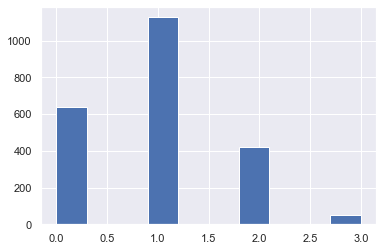

In [18]:
plt.figsize=(14,7)
plt.hist(df['Children']);

###  Data Wrangling 
 <br>
The first thing is a way to compare customers behaviors. Look at the customer information closely and re-organize them into new categories. And look for trends which can help business formulate future offers.

The 0/1 indicators are for whether or not customers responded to a given offer.

 - 'Dt_Customer' - Date of customer's enrollment with the company: Get the number of days the customers enrolled as 'Days_Enrolled'

In [19]:
# use pd.to_datetime() to parse the values in the column 'Dt_Customer
df['Dt_Customer']= pd.to_datetime(df.Dt_Customer)

In [20]:
# use datetime.today() to get number of days the customers enrolled 
df['Days_Enrolled'] = datetime.today() - df.Dt_Customer

In [21]:
# use .dt.days to exrtact days in timedelta data type;
# https://stackoverflow.com/questions/31283001/get-total-number-of-hours-from-a-pandas-timedelta
df['Days_Enrolled'] = df.Days_Enrolled.dt.days

 - 'AcceptedCmp' 1-6: Customers' responses to the marketing champaign 

In [22]:
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

AcceptedCmp1: 
0    2096
1     144
Name: AcceptedCmp1, dtype: int64
AcceptedCmp2: 
0    2210
1      30
Name: AcceptedCmp2, dtype: int64
AcceptedCmp3: 
0    2077
1     163
Name: AcceptedCmp3, dtype: int64
AcceptedCmp4: 
0    2073
1     167
Name: AcceptedCmp4, dtype: int64
AcceptedCmp5: 
0    2077
1     163
Name: AcceptedCmp5, dtype: int64
AcceptedCmp6: 
0    1906
1     334
Name: AcceptedCmp6, dtype: int64


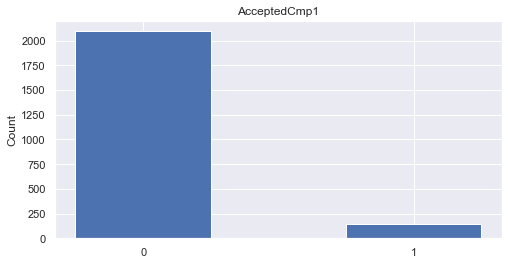

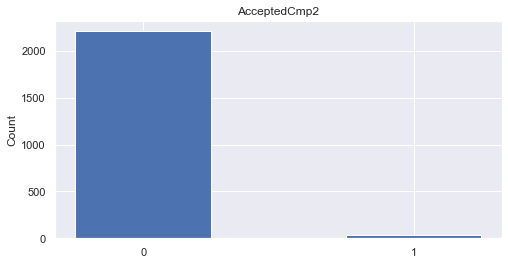

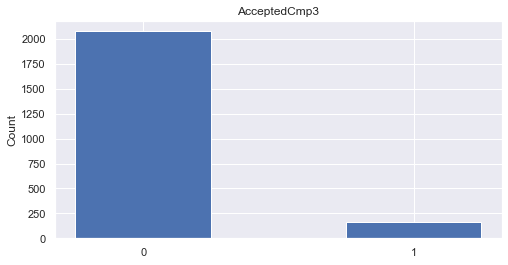

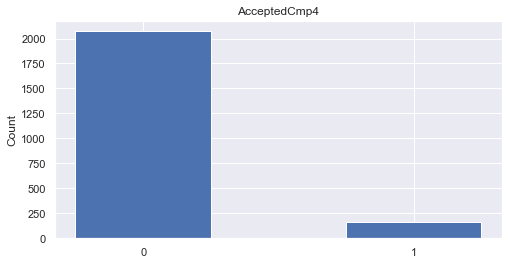

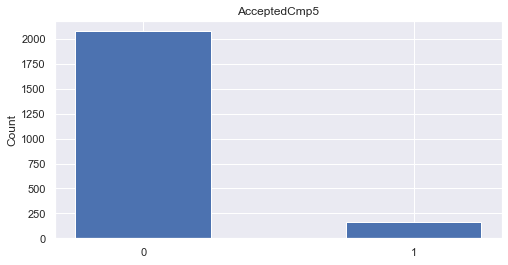

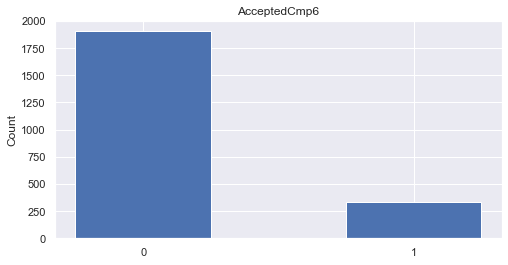

In [23]:
cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6']
for col in cols:
    bar_plot(col);    

 - rename the purchased products

In [24]:
# rename the purchased products
old = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
new = ["Wines","Fruits","Meat", "Fish","Sweets","Gold"]
df.rename(columns=dict(zip(old, new)), inplace=True)

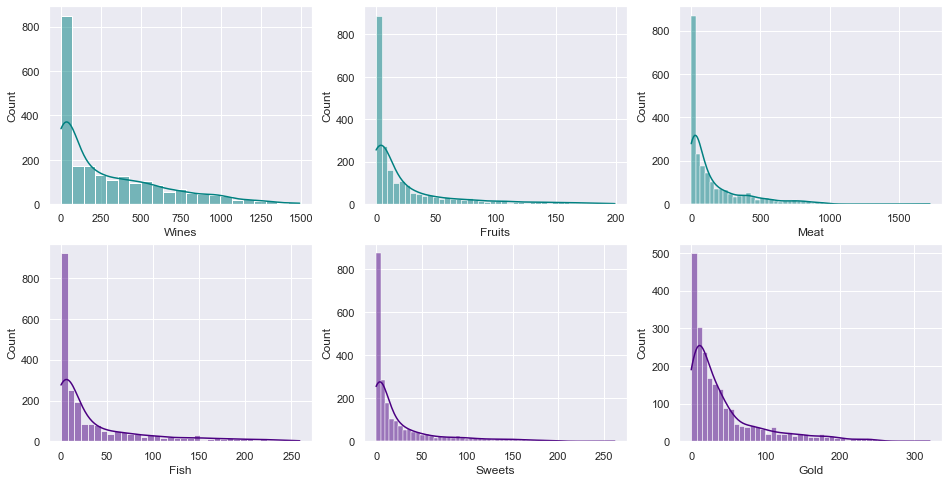

In [86]:
fig, axs = plt.subplots(2, 3, figsize=(16,8)) 

sns.histplot(data=df, x="Wines", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="Fruits", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="Meat", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="Fish", kde=True, color="indigo", ax=axs[1, 0])
sns.histplot(data=df, x="Sweets", kde=True, color="indigo", ax=axs[1, 1])
sns.histplot(data=df, x="Gold", kde=True, color="indigo", ax=axs[1, 2])

plt.show()

 - 'Total_Spent' amount per customer

In [26]:
# use '+' to sum the total spent amount
df['Total_Spent'] = df.Wines + df.Fruits + df.Meat + df.Fish + df.Sweets + df.Gold

 - 'Age_group'

In [27]:
df = df[df['Age'] < 100]

In [28]:
# use pd.cut() to separate ages into groups
df['Age_group'] = pd.cut(df.Age, [20,30,40,50,60,70,80],
                         labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [29]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp6']

In [30]:
## sns.histplot('Total_AcceptedCmp') ???/

In [31]:
spent = pd.melt(df[['Age_group', 'Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']],
                id_vars='Age_group',
                var_name='Products',
                value_vars=['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold'],
                value_name='Expenses')

In [32]:
spent.head()

,Age_group,Products,Expenses
0,60-70,Wines,635
1,60-70,Wines,11
2,50-60,Wines,426
3,30-40,Wines,11
4,40-50,Wines,173


In [33]:
spent.describe()

,Expenses
count,13422.000000
mean,100.957234
std,198.749279
min,0.000000
25%,5.000000
50%,22.000000
75%,92.000000
max,1725.000000


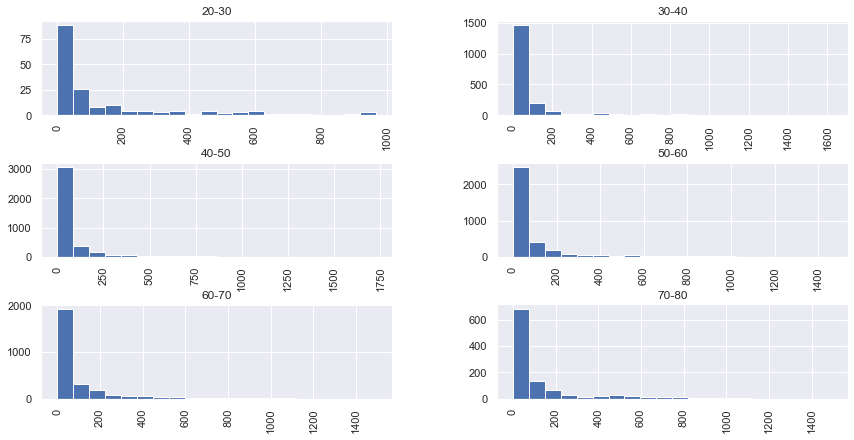

In [74]:
spent.hist(by='Age_group', bins=20, figsize=(14,7));

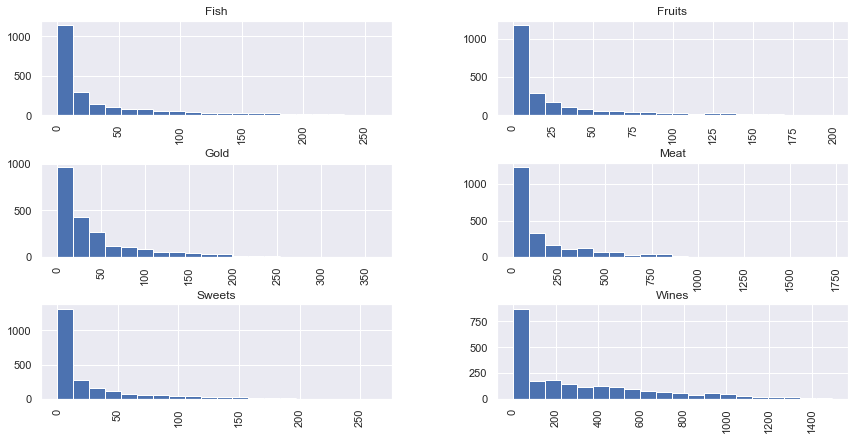

In [35]:
spent.hist(by='Products', bins=20, figsize=(14,7));

### A visual summary of the expenses of people at different ages 
Visualizing and retrieving the relational information between independent variables.

 - 'Age' vs ' Expenses'

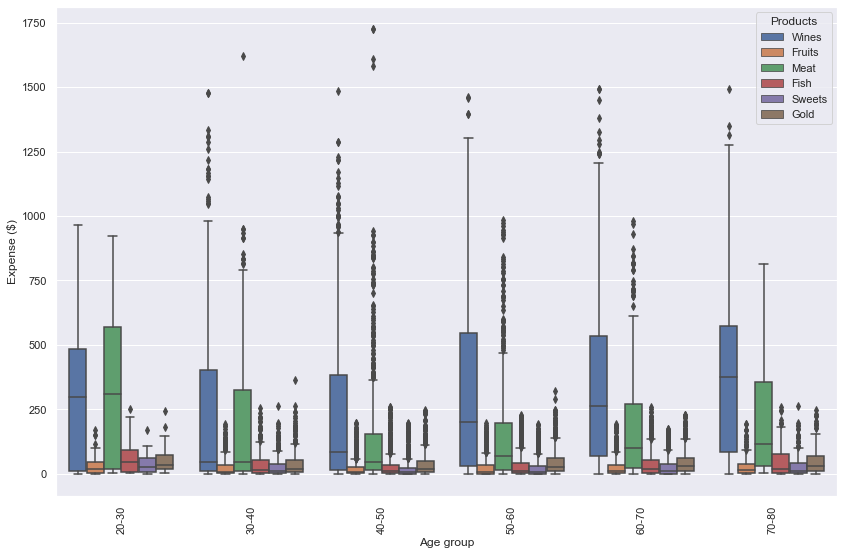

In [36]:
plt.subplots(figsize=(14, 9))
sns.boxplot(x='Age_group', y='Expenses', hue='Products', data=spent)
plt.xticks(rotation='vertical')
plt.ylabel('Expense ($)')
plt.xlabel('Age group');

In [37]:
age_spent_mean = df.groupby(['Age_group']).mean()

In [38]:
# young people spend more on meat and senior people spend more on wines...
age_spent_mean[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Total_Spent']] 

,Wines,Fruits,Meat,Fish,Sweets,Gold,Total_Spent
Age_group,,,,,,,
20-30,308.785714,39.035714,314.321429,67.214286,39.821429,58.821429,828.000000
30-40,250.635220,28.345912,183.078616,37.053459,28.808176,43.003145,570.924528
40-50,241.923547,22.545872,141.108563,32.940367,24.050459,38.324159,500.892966
50-60,320.434188,26.157265,154.627350,35.437607,25.856410,45.647863,608.160684
60-70,364.854123,27.560254,180.801268,40.942918,28.824524,47.143763,690.126850
70-80,406.853107,31.271186,211.237288,48.468927,32.700565,50.519774,781.050847


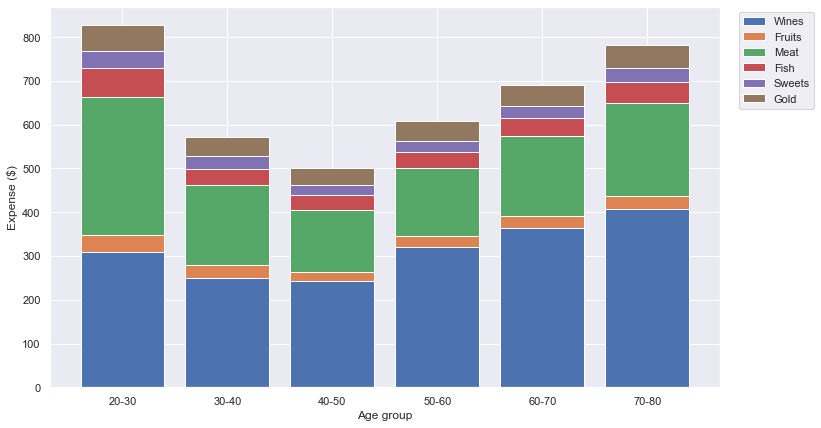

In [39]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(figsize=(12,7))
ax.bar(age_spent_mean.index, age_spent_mean['Wines'], label='Wines')
ax.bar(age_spent_mean.index, age_spent_mean['Fruits'], bottom=age_spent_mean['Wines'], label='Fruits')
ax.bar(age_spent_mean.index, age_spent_mean['Meat'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'], label='Meat')
ax.bar(age_spent_mean.index, age_spent_mean['Fish'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'], label='Fish')
ax.bar(age_spent_mean.index, age_spent_mean['Sweets'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'], label='Sweets')
ax.bar(age_spent_mean.index, age_spent_mean['Gold'], bottom=age_spent_mean['Wines'] + age_spent_mean['Fruits'] 
       + age_spent_mean['Meat'] + age_spent_mean['Fish'] + age_spent_mean['Sweets'], label='Gold')

#ax.set_xticklabels(age_spent_mean.index, rotation=90)
ax.set_xlabel('Age group')
ax.set_ylabel('Expense ($)')
ax.legend(bbox_to_anchor= (1.02, 1));

 - The figure above gives us a sense how the average expenses vary from young people to senior people as the following: Young people appear spending more on food (meat and fish) and senior people spending more on wines (less on sweets) while middle-aged people spending the least. 

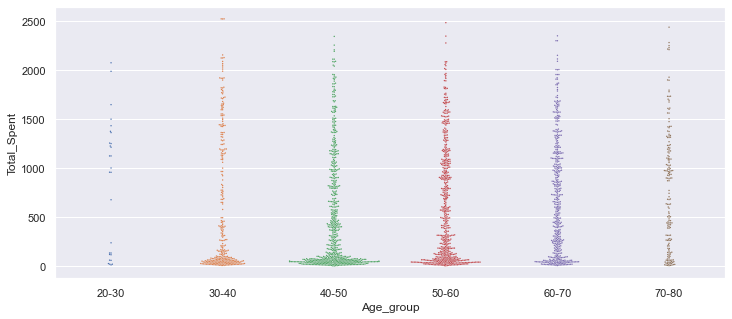

In [40]:
# categorical plot
plt.subplots(figsize=(12, 5))
sns.swarmplot(x='Age_group', y='Total_Spent', data=df, size=1.4);

 - 'Income'

In [41]:
# 'Income' greater than 300,000 are removed.
df = df[df['Income'] < 300000] 

 - Remove less useful information (Drop columns)
 - Variables 'Z_CostContact' and 'Z_Revenue' are not shown on the variable description.

In [42]:
print(df['Z_CostContact'].unique())
print(df['Z_Revenue'].unique())

[3]
[11]


 - 'Z_CostContact' = 3;
 - 'Z_Revenue' = 11;
 - 'Recency' - less significant with little variation

In [43]:
To_Drop = ['Year_Birth', 'Education', 'Marital_Status','Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'Z_CostContact', 'Z_Revenue', 'Complain']
df.drop(columns=To_Drop, inplace=True)

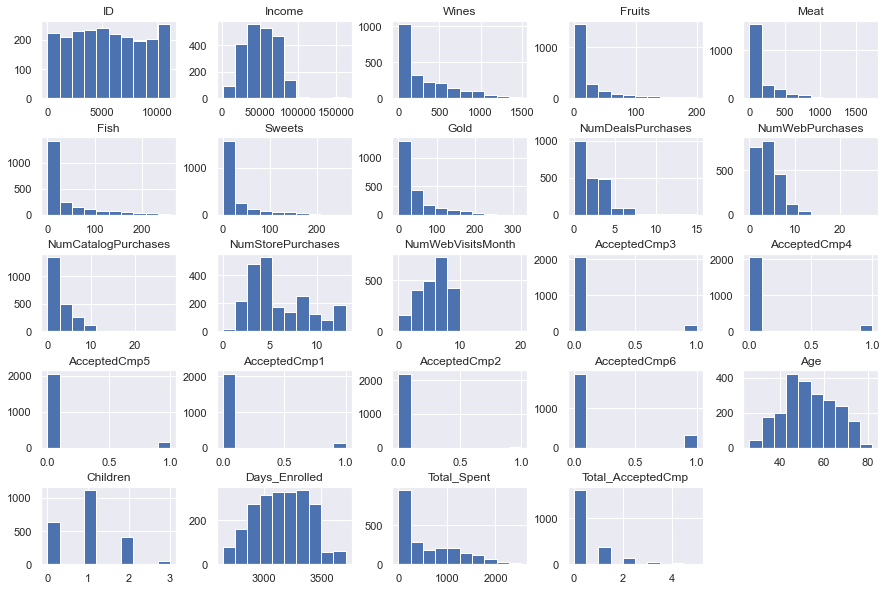

In [44]:
# `hist` method to plot histograms of each of the numeric features
# plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Saving data

In [45]:
print(df.shape)

(2212, 27)


In [46]:
# save the data to a new csv file
datapath = './Data'
save_file(df, '01_cleaned_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "./Data\01_cleaned_data.csv"


Inferences so far:
   - The dataset has 2212 rows & 27 columns.
   - No any missing values in the dataset.
   - We could see that the data is right skewed for most of the features (the mean value is larger than median value (50th percentile: 50%). This is an indication that those features have a right skewed data.
   - There is a slight imbalance in the dataset (The number of middle aged people is more than that of young or senior people).